In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


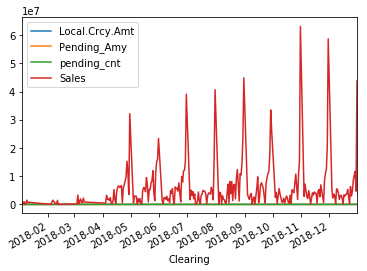

In [61]:
df=pd.read_csv('MyData.csv',usecols=['Clearing','Local.Crcy.Amt','Sales','Pending_Amy','pending_cnt'],parse_dates=['Clearing'])
df.index=df['Clearing']
df.drop(columns='Clearing',inplace=True)
df=df.groupby(df.index).sum()
df=df[df.index<pd.to_datetime('20190101',format='%Y%m%d')]
df.plot()

In [62]:
date='20181105'
train=df[df.index < pd.to_datetime(date,format='%Y%m%d')]
test=df[df.index >= pd.to_datetime(date,format='%Y%m%d')]

In [63]:
train.head()

,Local.Crcy.Amt,Pending_Amy,pending_cnt,Sales
Clearing,,,,
2018-01-04,0.16,0.00,0,741.982
2018-01-05,16.66,191.01,1457,504805.880
2018-01-06,40.65,1068.96,7390,973344.268
2018-01-07,1.97,7.36,60,32371.638
2018-01-08,24.68,521.82,3672,400549.374


In [64]:
train = train.values
test= test.values


In [65]:
x=train[:,0].reshape(len(train),1)
y=test[:,0].reshape(len(test),1)
crc=MinMaxScaler(feature_range=(0,1))
crc.fit(x)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [66]:
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train)
test= sc.transform(test)

In [67]:
X_train = []
y_train = []
for i in range(15, len(train)):
    X_train.append(train[i-15:i, ])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1] , len(df.columns)))



In [68]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], len(df.columns))))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
206/206 [==============================] - 17s 84ms/step - loss: 0.0739
Epoch 2/150
206/206 [==============================] - 1s 7ms/step - loss: 0.0358
Epoch 3/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0312
Epoch 4/150
206/206 [==============================] - 1s 7ms/step - loss: 0.0322
Epoch 5/150
206/206 [==============================] - 2s 8ms/step - loss: 0.0305
Epoch 6/150
206/206 [==============================] - 2s 9ms/step - loss: 0.0309
Epoch 7/150
206/206 [==============================] - 2s 11ms/step - loss: 0.0310
Epoch 8/150
206/206 [==============================] - 5s 25ms/step - loss: 0.0306
Epoch 9/150
206/206 [==============================] - 7s 32ms/step - loss: 0.0311
Epoch 10/150
206/206 [==============================] - 2s 12ms/step - loss: 0.0311
Epoch 11/150
206/206 [==============================] - 4s 20ms/step - loss: 0.0295
Epoch 12/150
206/206 [==============================] - 3s 17ms/step - loss: 0.0304
Epoch

206/206 [==============================] - 1s 6ms/step - loss: 0.0220
Epoch 100/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0223
Epoch 101/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0223
Epoch 102/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0207
Epoch 103/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0228
Epoch 104/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0222
Epoch 105/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0237
Epoch 106/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0241
Epoch 107/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0204
Epoch 108/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0233
Epoch 109/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0221
Epoch 110/150
206/206 [==============================] - 1s 6ms/step - loss: 0.0222
Epoch 

In [69]:
X_test=[]
for i in range(15, len(test)):
        X_test.append(test[i-15:i, ])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(df.columns)))

In [70]:
predicted = regressor.predict(X_test)
predicted = crc.inverse_transform(predicted)

actual = sc.inverse_transform(test)

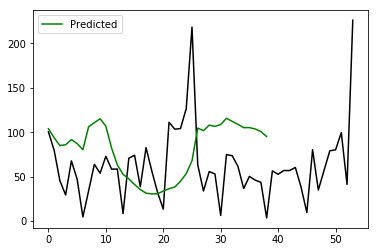

In [71]:
x1=actual[:,0]
#x2=predicted[:,0]
plt.plot(x1, color = 'black')
plt.plot(predicted, color = 'green', label = 'Predicted')
plt.legend()
plt.show()